In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('goals_predict.csv')
df.head()

,player_id,name,season,age_at_season_start,position,foot,height_in_cm,avg_market_value_season,appearances_season,total_minutes_played_season,total_goals_season,total_assists_season
0,10,Miroslav Klose,2012,34.06,Attack,right,184.0,4000000.0,36,2585,16,3
1,10,Miroslav Klose,2013,35.06,Attack,right,184.0,1000000.0,29,2220,8,5
2,10,Miroslav Klose,2014,36.06,Attack,right,184.0,1000000.0,40,2289,16,9
3,10,Miroslav Klose,2015,37.06,Attack,right,184.0,1000000.0,31,1714,8,8
4,132,Tomas Rosicky,2012,31.74,Midfield,both,179.0,2000000.0,15,904,3,1


In [3]:
df_processed = pd.get_dummies(df, columns=['position', 'foot'], dtype=int)
df_processed['age_at_season_start'] = df_processed['age_at_season_start'].astype(int)
df_processed.head()

,player_id,name,season,age_at_season_start,height_in_cm,avg_market_value_season,appearances_season,total_minutes_played_season,total_goals_season,total_assists_season,position_Attack,position_Defender,position_Midfield,position_Missing,foot_both,foot_left,foot_right
0,10,Miroslav Klose,2012,34,184.0,4000000.0,36,2585,16,3,1,0,0,0,0,0,1
1,10,Miroslav Klose,2013,35,184.0,1000000.0,29,2220,8,5,1,0,0,0,0,0,1
2,10,Miroslav Klose,2014,36,184.0,1000000.0,40,2289,16,9,1,0,0,0,0,0,1
3,10,Miroslav Klose,2015,37,184.0,1000000.0,31,1714,8,8,1,0,0,0,0,0,1
4,132,Tomas Rosicky,2012,31,179.0,2000000.0,15,904,3,1,0,0,1,0,1,0,0


In [4]:
X = df_processed.drop(['player_id', 'name', 'avg_market_value_season', 'foot_both', 'position_Missing', 'total_goals_season', 'total_assists_season'], axis=1)
X.head()

,season,age_at_season_start,height_in_cm,appearances_season,total_minutes_played_season,position_Attack,position_Defender,position_Midfield,foot_left,foot_right
0,2012,34,184.0,36,2585,1,0,0,0,1
1,2013,35,184.0,29,2220,1,0,0,0,1
2,2014,36,184.0,40,2289,1,0,0,0,1
3,2015,37,184.0,31,1714,1,0,0,0,1
4,2012,31,179.0,15,904,0,0,1,0,0


In [5]:
y = df_processed[['total_goals_season', 'total_assists_season']]
y.head()
type(y)

pandas.core.frame.DataFrame

In [6]:
# Add Bias

X_bias = pd.concat([pd.Series(1, index=X.index, name='bias'), X], axis=1)
X_bias.head()


,bias,season,age_at_season_start,height_in_cm,appearances_season,total_minutes_played_season,position_Attack,position_Defender,position_Midfield,foot_left,foot_right
0,1,2012,34,184.0,36,2585,1,0,0,0,1
1,1,2013,35,184.0,29,2220,1,0,0,0,1
2,1,2014,36,184.0,40,2289,1,0,0,0,1
3,1,2015,37,184.0,31,1714,1,0,0,0,1
4,1,2012,31,179.0,15,904,0,0,1,0,0


In [7]:
# Create a shuffled index
shuffled_idx = X_bias.sample(frac=1, random_state=42).index

# Split indices
train_idx = shuffled_idx[:int(0.8 * len(shuffled_idx))]
test_idx = shuffled_idx[int(0.8 * len(shuffled_idx)):]

# Split X and y using the same indices
X_train = X_bias.loc[train_idx]
X_test = X_bias.loc[test_idx]

y_train = y.loc[train_idx]
y_test = y.loc[test_idx]


In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.tail())
X_train.tail()


(61832, 11)
(15459, 11)
(61832, 2)
(15459, 2)
       total_goals_season  total_assists_season
982                     0                     0
5023                    0                     1
60886                   7                     4
24930                   0                     0
41495                   2                     0


,bias,season,age_at_season_start,height_in_cm,appearances_season,total_minutes_played_season,position_Attack,position_Defender,position_Midfield,foot_left,foot_right
982,1,2017,36,189.0,11,578,0,0,1,0,1
5023,1,2012,28,178.0,32,2864,0,0,1,0,1
60886,1,2022,24,191.0,55,4938,0,1,0,0,1
24930,1,2014,22,183.0,15,1068,0,1,0,0,1
41495,1,2024,30,190.0,37,2694,0,1,0,0,1


In [9]:
col_std = X_train.columns[1:6]

mean = X_train[col_std].mean()
std = X_train[col_std].std()

# Scaling

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[col_std] = (X_train[col_std] - mean) / std
X_test_scaled[col_std] = (X_test[col_std] - mean) / std

X_train_scaled


,bias,season,age_at_season_start,height_in_cm,appearances_season,total_minutes_played_season,position_Attack,position_Defender,position_Midfield,foot_left,foot_right
61820,1,-0.270838,-1.295597,0.698375,-1.557605,-1.241320,0,1,0,1,0
10138,1,-0.000825,1.201733,-1.799233,1.362190,1.764384,0,1,0,1,0
72371,1,0.539201,-0.614507,0.386174,0.064503,-0.692088,1,0,0,0,1
28346,1,-0.810864,-0.614507,-0.394329,-1.476500,-1.310338,0,0,1,0,1
64400,1,1.619252,0.066583,2.103280,-0.259918,0.036007,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
982,1,-0.270838,2.563912,1.166677,-0.746551,-0.766939,0,0,1,0,1
5023,1,-1.620903,0.747673,-0.550429,0.956663,1.455259,0,0,1,0,1
60886,1,1.079227,-0.160447,1.478878,2.822087,3.471375,0,1,0,0,1
24930,1,-1.080877,-0.614507,0.230074,-0.422129,-0.290615,0,1,0,0,1


In [10]:
# --- 1. Log transform ---
y_train_log = np.log1p(y_train)   # shape (n_samples, 2)
y_test_log = np.log1p(y_test)

# --- 2. Compute mean and std per output (column-wise) ---
y_mean = y_train_log.mean(axis=0)   # shape (2,)
y_std = y_train_log.std(axis=0)     # shape (2,)

# --- 3. Scale ---
y_train_scaled = (y_train_log - y_mean) / y_std
y_test_scaled = (y_test_log - y_mean) / y_std


In [11]:
# --- Normal Equation ---
# Prepare matrices
X_train_mat = X_train_scaled.values.astype(float)
y_train_mat = y_train_scaled.values.astype(float)
# Calculate weights using the Normal Equation
# w = (X^T * X)^-1 * X^T * y
w = np.linalg.inv(X_train_mat.T @ X_train_mat) @ X_train_mat.T @ y_train_mat


In [12]:
# Convert X_test to NumPy array
X_test_mat = X_test_scaled.values.astype(float)  # Shape: (n_samples, n_features)


# Predict (still in log + standardized space)
y_pred_scaled = X_test_mat @ w           # Shape: (n_samples, 2)

# Invert the scaling (standardization) using broadcasting
y_pred_log = y_pred_scaled * y_std.values + y_mean.values   # y_std, y_mean shape: (2,)

# Invert the log-transform element-wise
y_pred = np.expm1(y_pred_log)            # Shape: (n_samples, 2)

# Clip predictions to be non-negative
y_pred[y_pred < 0] = 0

In [13]:

# Ensure y_pred and y_test are NumPy arrays
y_true = y_test.values
# y_pred = y_pred.flatten()

# Mean Squared Error
mse = np.mean((y_true - y_pred) ** 2)

# Mean Absolute Error
mae = np.mean(np.abs(y_true - y_pred))

print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")



Mean Squared Error (MSE): 5.79
Mean Absolute Error (MAE): 1.26


In [14]:
results = pd.DataFrame({
    'Actual_goals': y_true[:, 0],
    'Predicted_goals': y_pred[:, 0],
    'Actual_assists': y_true[:, 1],
    'Predicted_assists': y_pred[:, 1]
})

print(results.head(10))


   Actual_goals  Predicted_goals  Actual_assists  Predicted_assists
0             1         0.682959               0           0.945371
1             0         0.000000               1           0.000000
2             1         0.256507               0           0.587039
3             0         0.385887               0           0.551380
4             0         0.034224               0           0.233372
5             0         1.518883               1           1.890792
6            16         8.184457              14           5.724274
7             0         0.465378               0           0.565255
8            14         3.728830               3           2.098826
9             2         1.851602               0           0.787089


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')


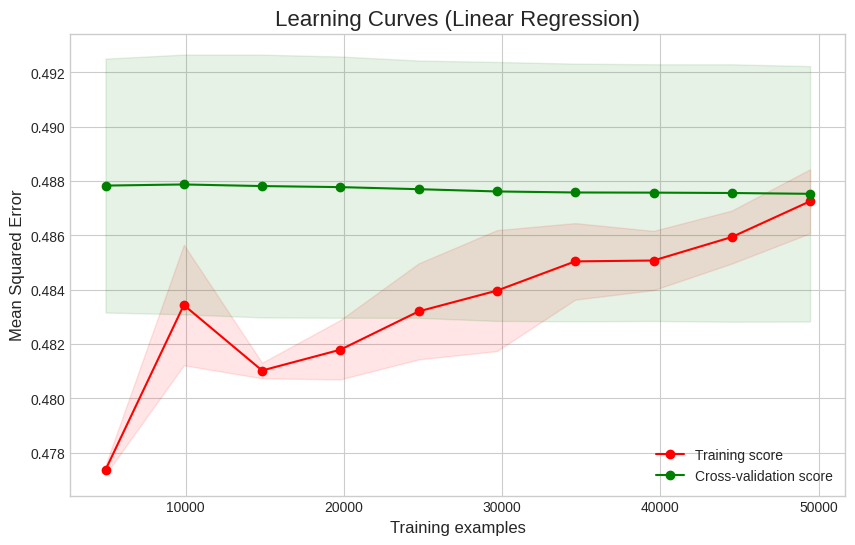

In [16]:
# We use a LinearRegression model from scikit-learn which is equivalent to the Normal Equation.
# The function will train it on subsets of the data to generate the curves.
estimator = LinearRegression()
# Generate learning curve data
# This may take a moment to run
train_sizes, train_scores, test_scores = learning_curve(
    estimator,
    X_train_scaled,
    y_train_scaled,  # Use the scaled target variable as this is what the model was trained on
    cv=5,            # 5-fold cross-validation
    scoring='neg_mean_squared_error', # Use a scoring metric
    n_jobs=-1,       # Use all available CPU cores
    train_sizes=np.linspace(0.1, 1.0, 10) # Train on 10 different data sizes
)
# Calculate mean and standard deviation for plotting
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title("Learning Curves (Linear Regression)", fontsize=16)
plt.xlabel("Training examples", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.legend(loc="best")
plt.grid(True)
plt.show()


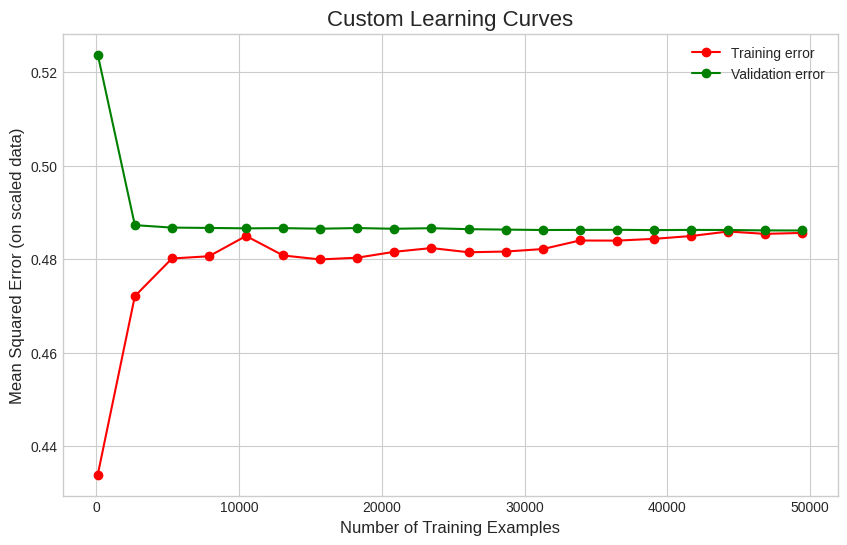

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# --- Configuration ---
# Define the sizes of the training subsets to evaluate on.
# We'll start with a small number of samples and increase to the full training set.
train_sizes = np.linspace(100, X_train_scaled.shape[0] * 0.8, 20, dtype=int)
# Initialize lists to store the error scores
train_errors = []
val_errors = []
# Get the full validation set (we evaluate against this every time)
X_val_mat = X_test_scaled.values.astype(float)
y_val_mat = y_test_scaled.values.astype(float)
# --- Regularization Term ---
# Add a small value (lambda) to the diagonal of X.T @ X to ensure it's invertible,
# especially for small sample sizes. This is known as Ridge regularization.
lambda_reg = 0.01
n_features = X_train_scaled.shape[1]
identity_matrix = np.identity(n_features)
# --- Main Loop ---
# Iterate over the different training set sizes
for m in train_sizes:
    # 1. Select a subset of the training data
    X_train_subset = X_train_scaled.iloc[:m].values.astype(float)
    y_train_subset = y_train_scaled.iloc[:m].values.astype(float)
    # 2. Train the model (Normal Equation with Regularization)
    # w = (X^T * X + λI)^-1 * X^T * y
    w = np.linalg.inv(X_train_subset.T @ X_train_subset + lambda_reg * identity_matrix) @ X_train_subset.T @ y_train_subset
    # 3. Make predictions on the training subset and the validation set
    y_train_pred = X_train_subset @ w
    y_val_pred = X_val_mat @ w
    # 4. Calculate the Mean Squared Error for both and store them
    train_mse = np.mean((y_train_subset - y_train_pred) ** 2)
    val_mse = np.mean((y_val_mat - y_val_pred) ** 2)
    train_errors.append(train_mse)
    val_errors.append(val_mse)
# --- Plotting the Curves ---
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, 'o-', color="r", label="Training error")
plt.plot(train_sizes, val_errors, 'o-', color="g", label="Validation error")
plt.title("Custom Learning Curves", fontsize=16)
plt.xlabel("Number of Training Examples", fontsize=12)
plt.ylabel("Mean Squared Error (on scaled data)", fontsize=12)
plt.legend(loc="best")
plt.grid(True)
# Optional: Set a y-axis limit if the initial error is very high
# plt.ylim(0, 1.0)
plt.show()


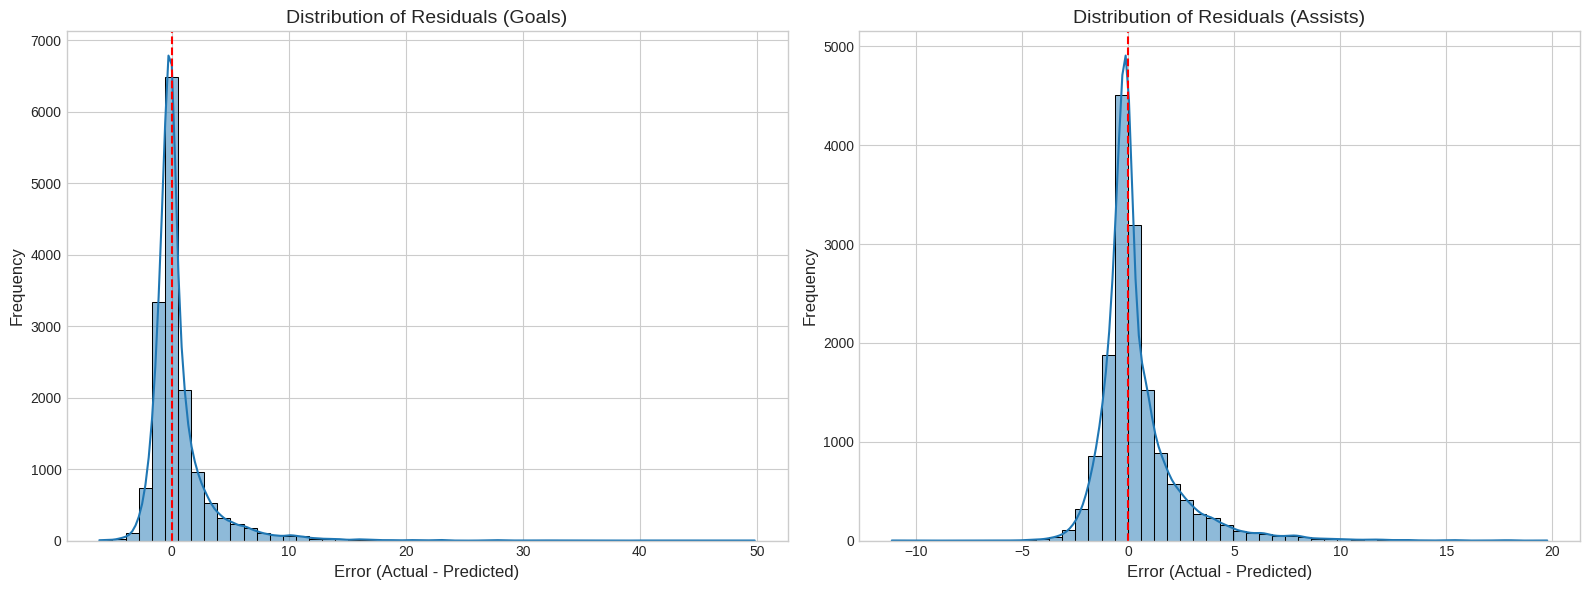

In [18]:
# Ensure y_true and y_pred are available from previous cells
# y_true = y_test.values
# y_pred = ...
# Calculate residuals
residuals = y_true - y_pred
# --- Plot: Distribution of Residuals ---
# This plot shows the overall bias of the model.
# Look for:
# - A bell-shaped curve centered close to 0 (Good)
# - A curve shifted away from 0 (Bad - indicates a systematic bias, e.g., the model consistently predicts too high or too low)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# Distribution plot for Goal Residuals
sns.histplot(residuals[:, 0], kde=True, ax=ax1, bins=50)
ax1.axvline(x=0, color='r', linestyle='--')
ax1.set_title('Distribution of Residuals (Goals)', fontsize=14)
ax1.set_xlabel('Error (Actual - Predicted)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
# Distribution plot for Assist Residuals
sns.histplot(residuals[:, 1], kde=True, ax=ax2, bins=50)
ax2.axvline(x=0, color='r', linestyle='--')
ax2.set_title('Distribution of Residuals (Assists)', fontsize=14)
ax2.set_xlabel('Error (Actual - Predicted)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


In [22]:
# --- Save the Linear Regression (Normal Eq.) Model Assets ---
import os
import pickle
import numpy as np
# Define the directory to save the assets
save_dir = 'saved_model/normal_equation'
os.makedirs(save_dir, exist_ok=True)
# --- Save the Weights (the "model") ---
# The 'w' variable holds the trained weights from the normal equation.
weights_path = os.path.join(save_dir, 'weights.npy')
np.save(weights_path, w)
print(f"✅ Linear Regression weights saved to:  {weights_path}")
# --- Save the Scaling Parameters ---
# In this notebook, scaling was done manually. We need to save the mean and std values.

scaling_params = {
    'mean': mean.values,     # Save as NumPy array
    'std': std.values,       # Save as NumPy array
    'y_mean': y_mean.values, # Save as NumPy array
    'y_std': y_std.values    # Save as NumPy array
}

scalers_path = os.path.join(save_dir, 'scalers.pkl')
with open(scalers_path, 'wb') as f:
    pickle.dump(scaling_params, f)
    
print(f"✅ Linear Regression scaling parameters saved to:  {scalers_path}")
print("\nAll necessary assets for the Linear Regression model have been saved.")

# Define column order (adjust based on your training data)
col_order = ['bias', 'season', 'age_at_season_start', 'height_in_cm', 'appearances_season', 
             'total_minutes_played_season', 'position_Attack', 'position_Defender', 
             'position_Midfield', 'foot_left', 'foot_right']
col_order_path = os.path.join(save_dir, 'col_order.pkl')
with open(col_order_path, 'wb') as f:
    pickle.dump(col_order, f)
print(f"✅ Column order saved to: {col_order_path}")



✅ Linear Regression weights saved to:  saved_model/normal_equation/weights.npy
✅ Linear Regression scaling parameters saved to:  saved_model/normal_equation/scalers.pkl

All necessary assets for the Linear Regression model have been saved.
✅ Column order saved to: saved_model/normal_equation/col_order.pkl


In [26]:
import pickle

# Example: contents of your model
model = {
    "theta": w,                       # numpy array
    "feature_means": mean,       # numpy array or None
    "feature_stds": std,         # numpy array or None
    "add_intercept": True                 # boolean
}

# Save to a file
with open("linear_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [ ]:
import numpy as np
import pickle

# === Load the model ===
with open("linear_model.pkl", "rb") as f:
    model = pickle.load(f)

theta = model["theta"]
feature_means = model["feature_means"]
feature_stds = model["feature_stds"]
add_intercept = model["add_intercept"]



# # === Prepare new input ===
# # Replace this with your actual new data (shape: [n_samples, n_features])
# X_new = np.array([[1.5, 2.0, 0.5]])  # example input with 3 features

# # === Normalize if needed ===
# if feature_means is not None and feature_stds is not None:
#     X_new = (X_new - feature_means) / feature_stds

# # === Add intercept if model expects it ===
# if add_intercept:
#     X_new = np.c_[np.ones((X_new.shape[0], 1)), X_new]

# # === Make prediction ===
# y_pred = X_new @ theta
# print("Predicted value:", y_pred)


season                         2018.003057
age_at_season_start              24.706721
height_in_cm                    181.526119
appearances_season               20.204700
total_minutes_played_season    1366.959018
dtype: float64

In [30]:
# --- Save the Linear Regression (Normal Eq.) Model Assets ---
import os
import pickle
import numpy as np
# Define the directory to save the assets
save_dir = 'saved_model/normal_equation'
os.makedirs(save_dir, exist_ok=True)
# --- Save the Weights (the "model") ---
# The 'w' variable holds the trained weights from the normal equation.
weights_path = os.path.join(save_dir, 'weights.npy')
np.save(weights_path, w)
print(f"✅ Linear Regression weights saved to:   {weights_path}")
# --- Save the Scaling Parameters ---
# In this notebook, scaling was done manually. We need to save the mean and std values.
scaling_params = {
    'mean': mean.values,     # Save as NumPy array
    'std': std.values,       # Save as NumPy array
    'y_mean': y_mean.values, # Save as NumPy array
    'y_std': y_std.values    # Save as NumPy array
}
scalers_path = os.path.join(save_dir, 'scalers.pkl')
with open(scalers_path, 'wb') as f:
    pickle.dump(scaling_params, f)
print(f"✅ Linear Regression scaling parameters saved to:   {scalers_path}")
# --- Save the Column Order ---
# The column order is crucial for preprocessing new data correctly.
col_order = X_train.columns.tolist()
col_order_path = os.path.join(save_dir, 'col_order.pkl')
with open(col_order_path, 'wb') as f:
    pickle.dump(col_order, f)
print(f"✅ Column order saved to:  {col_order_path}")
print("\nAll necessary assets for the Linear Regression model have been saved.")


✅ Linear Regression weights saved to:   saved_model/normal_equation/weights.npy
✅ Linear Regression scaling parameters saved to:   saved_model/normal_equation/scalers.pkl
✅ Column order saved to:  saved_model/normal_equation/col_order.pkl

All necessary assets for the Linear Regression model have been saved.


In [31]:
col_order

['bias',
 'season',
 'age_at_season_start',
 'height_in_cm',
 'appearances_season',
 'total_minutes_played_season',
 'position_Attack',
 'position_Defender',
 'position_Midfield',
 'foot_left',
 'foot_right']